In [1]:
import numpy as np
import pickle
import os
import pandas as pd
from sklearn.naive_bayes import GaussianNB

In [2]:
with open(os.path.join('..', 'data', 'SemesterProject', 'processed_data.pkl'), 'rb') as f:
    df: pd.DataFrame = pd.read_pickle(f)

df['movements'] = df[['movement_id', 'skeleton']].apply(lambda r: np.repeat(r['movement_id'], r['skeleton'].shape[-1]), axis=1)

df

,movement_id,subject_id,episode_num,positions,angles,positions_path,angles_path,skeleton,movement_name,filled_skeleton,reshaped_skeleton,movements
0,4,6,3,"[[-3.02874, 75.90507, -270.5936, 0.0, 27.79706...","[[0.14469, 0.65008, -0.55925, 2.28859, 1.14512...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-3.02874, -3.0521766666666665, -3.233198000...",side_lunge,"[[[-3.02874, -3.02874, -3.0521766666666665, -3...","[[[-3.02874, -3.02874, -3.0521766666666665], [...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ..."
1,5,7,8,"[[-1.38662, 84.46687, -232.60986, 0.0, 28.7417...","[[1.29924, -0.9601, -1.45577, 1.84614, 0.07701...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-1.38662, -1.3767133333333332, -1.343484, -...",sit_to_stand,"[[[-1.38662, -1.3767133333333332, -1.343484, -...","[[[-1.38662, -1.3767133333333332, -1.343484], ...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
2,3,1,7,"[[-12.26233, 81.59789, -248.86124, -2e-05, 27....","[[4.66077, 56.68494, 0.06777, 1.09106, 3.04529...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-12.26233, -12.32828, -12.324802, -12.30633...",inline_lunge,"[[[-12.26233, -12.32828, -12.324802, -12.30633...","[[[-12.26233, -12.32828, -12.324802], [-12.306...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
3,3,2,8,"[[-32.37641, 83.38937, -259.35818, 0.0, 30.475...","[[6.7506, 30.05265, -0.95628, 1.56654, 5.7209,...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-32.37641, -32.4872, -32.529323999999995, -...",inline_lunge,"[[[-32.37641, -32.37641, -32.4872, -32.4872, -...","[[[-32.37641, -32.37641, -32.4872], [-32.4872,...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
4,1,2,4,"[[-5.75375, 91.87819, -256.75516, 0.0, 31.3124...","[[18.99975, 1.46816, -1.66474, 2.46127, -1.360...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-5.75375, -5.718733333333334, -5.70244, -5....",deep_squat,"[[[-5.75375, -5.75375, -5.718733333333334, -5....","[[[-5.75375, -5.75375, -5.718733333333334], [-...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,8,4,"[[17.04467, 71.51766, -242.50504, -1e-05, 30.1...","[[2.46397, -30.05998, 0.82837, 1.3109, -6.5417...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[17.04467, 17.053053333333335, 17.0540700000...",inline_lunge,"[[[17.04467, 17.04467, 17.053053333333335, 17....","[[[17.04467, 17.04467, 17.053053333333335], [1...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
996,5,2,9,"[[-8.55602, 86.74068, -246.46729, 0.0, 32.6057...","[[14.07636, 0.746, -0.30391, 2.17672, -2.15947...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-8.55602, -8.558116666666667, -8.550202, -8...",sit_to_stand,"[[[-8.55602, -8.55602, -8.558116666666667, -8....","[[[-8.55602, -8.55602, -8.558116666666667], [-...","[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
997,1,6,5,"[[-6.20921, 86.80801, -217.42557, 0.0, 27.6363...","[[2.47181, -3.54129, -2.92796, 2.75055, -0.980...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-6.20921, -6.245676666666665, -6.262276, -6...",deep_squat,"[[[-6.20921, -6.245676666666665, -6.262276, -6...","[[[-6.20921, -6.245676666666665, -6.262276], [...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
998,10,4,6,"[[-1.20263, 89.59221, -245.85535, -1e-05, 31.5...","[[-0.09863, -4.69102, -0.63648, 1.78622, -0.85...",../data/SemesterProject/Segmented Movements/Ki...,../data/SemesterProject/Segmented Movements/Ki...,"[[[-1.20263, -1.2766499999999998, -1.333304, -...",standing_shoulder_scaption,"[[[-1.20263, -1.20263, -1.2766499999999998

In [3]:
naive_bayes: GaussianNB = GaussianNB()

In [4]:
X: np.ndarray = df['skeleton'].iloc[0].reshape((-1, 66))
y: np.ndarray = np.repeat(df['movement_id'].iloc[0], X.shape[0])
X.shape, y.shape

((68, 66), (68,))

In [5]:
naive_bayes.fit(X, y)

GaussianNB()

In [6]:
y_pred: np.ndarray = naive_bayes.predict(X)

(y == y_pred).sum()

68

In [7]:
X_test: np.ndarray = df['skeleton'].iloc[5].reshape((-1, 66))
y_test: np.ndarray = np.repeat(df['movement_id'].iloc[5], X_test.shape[0])

y_pred_test: np.ndarray = naive_bayes.predict(X_test)

(y_pred_test == y_test).sum()

0

In [8]:
df['skeleton'].iloc[0].shape

(22, 3, 68)

In [9]:
X: np.ndarray = np.concatenate(df['skeleton'].values, axis=2).reshape((-1, 66))
y: np.ndarray = np.concatenate(df['movements'])

X.shape, y.shape

((74625, 66), (74625,))

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [11]:
# I realize this is a bad way of doing it but ye.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, shuffle=True, random_state=13)

X_train.shape, y_test.shape, y_train.shape

((59700, 66), (14925,), (59700,))

In [12]:
from sklearn.svm import SVC

In [13]:
model: SVC = SVC(kernel='poly', random_state=13)

model.fit(X_train, y_train)
y_pred: np.ndarray = model.predict(X_test)



Realistically I'm gonna have this be a Neural Network with some LSTMs and some Conv Nets but for Proof of Concept, this is what I'll be doing for now.

In [14]:
f1_score(y_pred, y_test, average='weighted'), accuracy_score(y_pred, y_test)

(0.19191918710221506, 0.12241206030150754)

In [15]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

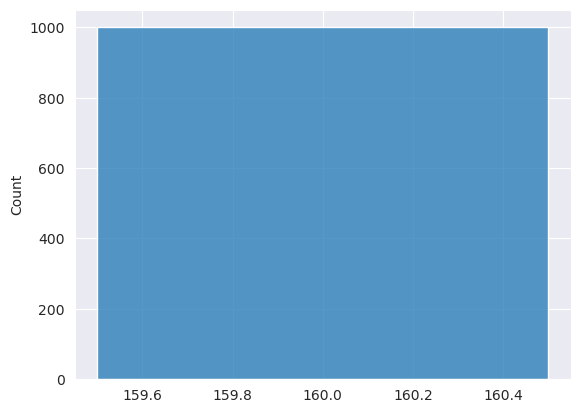

In [16]:
num_frames: np.ndarray = df['reshaped_skeleton'].apply(lambda r: r.shape[0]).values

sns.histplot(num_frames)